In [1]:
from pyproj import CRS
from pysheds.grid import Grid
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
# function for plotting maps
def plotFigure(data, label, cmap = 'Blues'):
    plt.figure(figsize=(12,12))
    plt.imshow(data, extent=grid.extent, cmap=cmap)
    plt.colorbar(label = label)
    plt.grid()

In [43]:
# Import global water table elevation raster
# wt_dem = gdal.Open('D:/!! Geodatabase/Groundwater/Fan_depthtowatertable/Processed/WT_elevation.tif')

In [46]:
# set bounding box
xmin, xmax = np.rint(x-10), np.rint(x+10)
ymin, ymax = np.rint(y-10), np.rint(y+10)

In [70]:
# Crop global elevation raster to bounding box around pour point and import and pysheds.grid object
# gdal.Translate('D:/!! Geodatabase/Groundwater/Groundwatersheds/Temp-DWTM/temp_clip.tif', wt_dem, projWin = [xmin, ymax, xmax, ymin])
# grid = Grid.from_raster('D:/!! Geodatabase/Groundwater/Groundwatersheds/Temp-DWTM/temp_clip.tif', data_name = 'dem')

In [81]:
# Import DEM
grid = Grid.from_raster('./temp_clip.tif', data_name = 'dem')

In [83]:
grid.flowdir('dem', out_name='dir') # ive tried filling sinks & fixing flats - doesn't make a difference

In [84]:
# define direction map
dirmap = (64, 128, 1, 2, 4, 8, 16, 32)

In [85]:
# specify pour point
x, y = -100, 50 # arbitrary

In [86]:
grid.catchment(data='dir', x=x, y=y, dirmap=dirmap, out_name='catch',
               recursionlimit=15000, xytype='label')

In [87]:
grid.clip_to('catch')
#plt.imshow(grid.view('catch'))
grid.view('catch')

Raster([[4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4]])

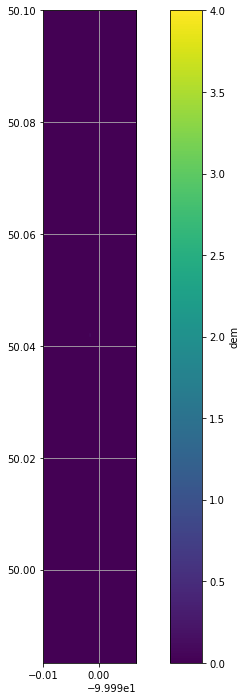

In [88]:
plotFigure(grid.catch, label = 'dem', cmap = 'viridis')